## Injury Risk Analysis Using Training and Recovery Data

**Objective:**  
Analyze athlete training, recovery, and injury history data to identify patterns associated with injury risk and highlight factors relevant to injury prevention.


In [19]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install folium
# !pip install kagglehub[pandas-datasets]

#print("Installation Complete")

## Data Overview

In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import kagglehub

In [6]:
import requests
import io
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

df = pd.read_csv("injury_data.csv")
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [8]:
df.shape

(1000, 7)

In [10]:
df.columns

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [14]:
df = df.rename(columns={
    'Player_Age': 'Age',
    'Player_Weight': 'Weight',
    'Player_Height': 'Height',
    'Previous_Injuries': 'Previous_Injuries',
    'Training_Intensity': 'Training_Intensity',
    'Recovery_Time': 'Recovery_Time',
    'Likelihood_of_Injury': 'Injury'
})


## Exploratory Data Analysis

In [16]:
df.head()

,Age,Weight,Height,Previous_Injuries,Training_Intensity,Recovery_Time,Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [18]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[15, 20, 25, 30, 35, 40, 45],
    right=False
)

# Injury rate by age group

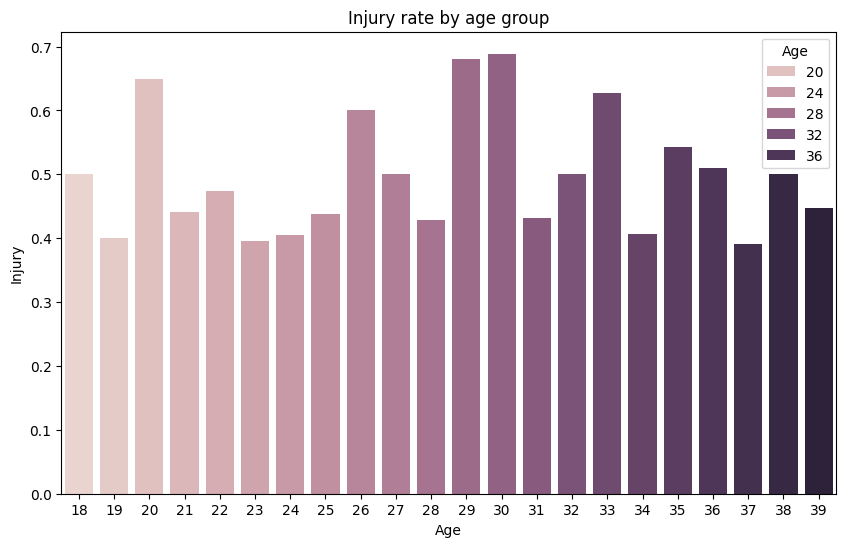

In [28]:
new_df = df.groupby('Age')['Injury'].mean().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(x='Age', y='Injury', hue='Age', data=new_df)
plt.xlabel('Age')
plt.ylabel('Injury')
plt.title('Injury rate by age group')

plt.show()            

Injury likelihood increases from younger ages into the late 20s, with the highest observed injury rates occurring around ages 29–30. After this peak, injury likelihood appears more variable, with no clear increasing trend beyond age 30. This suggests that late-20s athletes may represent a higher-risk period for injury, potentially due to cumulative workload or prior injury history.

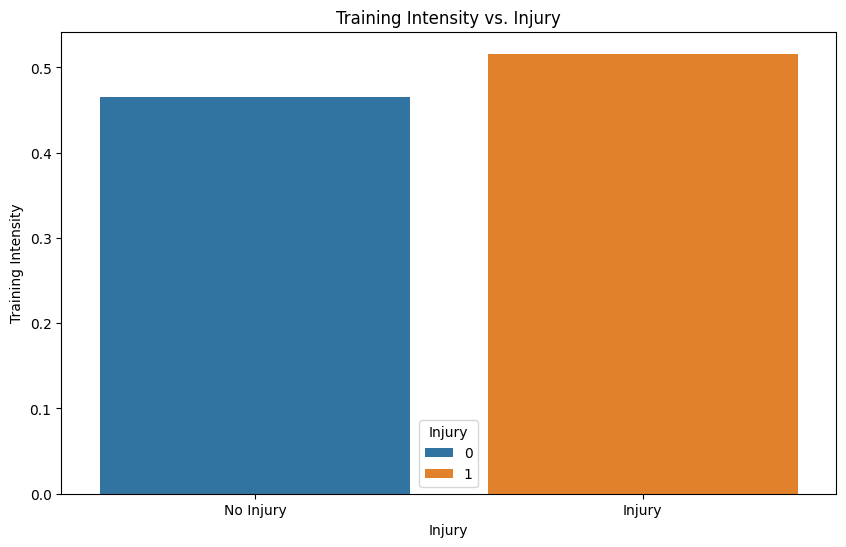

In [43]:
new_df2 = df.groupby('Injury')['Training_Intensity'].mean().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(x='Injury', y='Training_Intensity', hue='Injury', data=new_df2)
plt.xlabel('Injury')
plt.ylabel('Training Intensity')
plt.xticks([0, 1], ['No Injury', 'Injury'])
plt.title('Training Intensity vs. Injury')

plt.show()
           

Athletes who experienced injuries show a higher average training intensity compared to those who did not. While lower training intensity is associated with a reduced injury likelihood, the difference between groups is modest, suggesting that training intensity alone may not fully explain injury risk and should be considered alongside other factors such as recovery time and injury history.

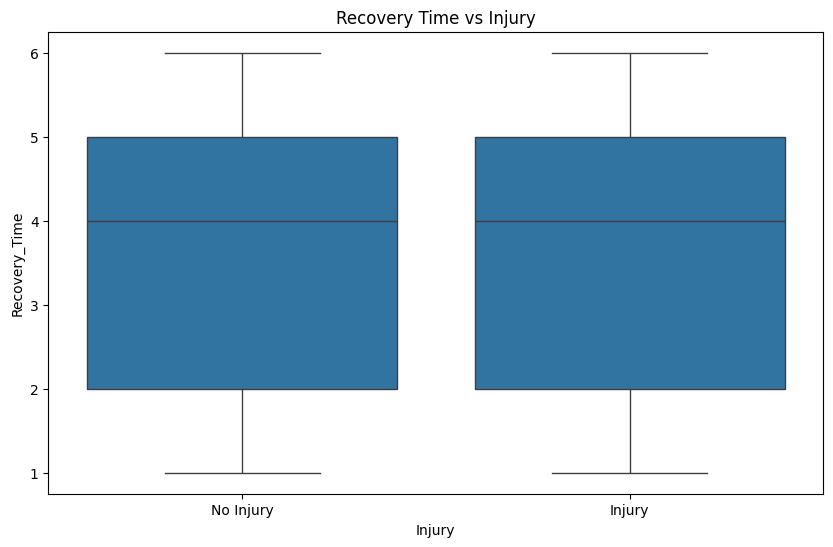

In [61]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Injury', y='Recovery_Time', data=df)
plt.xlabel('Injury')
plt.ylabel('Recovery_Time')
plt.xticks([0,1], ['No Injury', 'Injury'])
plt.title('Recovery Time vs Injury')

plt.show()
                   

The distribution of recovery time is similar for injured and non-injured athletes, with comparable medians and ranges. This suggests that recovery time alone may not be a strong distinguishing factor for injury risk and should be evaluated alongside other variables such as training intensity and injury history.

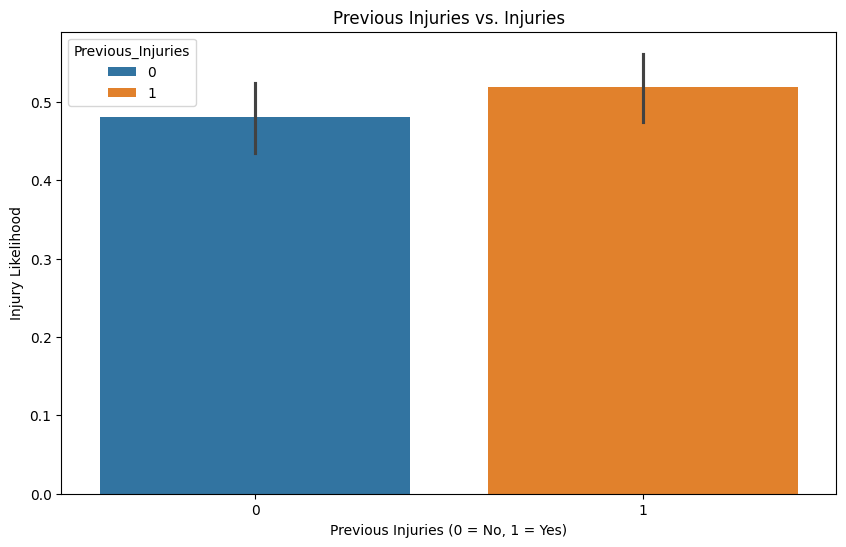

In [72]:
plt.figure(figsize=(10,6))

sns.barplot(x='Previous_Injuries', y='Injury', hue='Previous_Injuries', data=df)
plt.xlabel('Previous Injuries (0 = No, 1 = Yes)')
plt.ylabel('Injury Likelihood')
plt.title('Previous Injuries vs. Injuries')

plt.show()

Athletes with a history of previous injuries show a slightly higher likelihood of subsequent injury compared to those without prior injuries. However, the difference between groups is relatively modest, suggesting that injury history alone may not be sufficient to explain injury risk and should be considered alongside other factors such as training intensity and recovery patterns.

## Key Findings

- Injury likelihood increases into the late 20s, with higher observed risk around ages 29–30.
- Athletes who experienced injuries showed higher average training intensity compared to non-injured athletes, though the difference was modest.
- Recovery time distributions were similar between injured and non-injured groups, suggesting recovery time alone may not strongly differentiate injury risk.
- Athletes with previous injuries demonstrated a slightly higher likelihood of subsequent injury, but the effect size was relatively small.

Overall, injury risk appears to be multifactorial rather than driven by a single variable.


## Injury Prevention Implications

These findings reinforce the importance of monitoring multiple factors when assessing injury risk. While higher training intensity and age show clearer associations with injury likelihood, recovery time and injury history appear to play supporting roles. In practice, injury prevention strategies should incorporate workload management, individualized recovery planning, and longitudinal monitoring rather than relying on a single risk indicator.


## Limitations and Next Steps

- This analysis is exploratory and does not establish causation.
- No statistical hypothesis testing was performed.
- Future work could include regression modeling or time-based analysis to further quantify injury risk factors.
